In [1]:
import numpy as np
import sacpy as scp
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
# load sst
sst = scp.load_sst()['sst']
ssta = scp.get_anom(sst)
ssta

<xarray.DataArray 'sst' (time: 372, lat: 13, lon: 57)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
         -0.43838512, -0.39504153],
        [        nan,         nan,         nan, ...,  0.05971687,
         -0.00956711, -0.17235787],
        [        nan,         nan,         nan, ...,  0.25652925,
         -0.00416474, -0.07999759]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [        nan,         nan,         nan, ...,         nan,
          0.15849629,  0.20575899],
        [        nan,         nan,         nan, ...,  0.4969    ,
          0.56747427,  0.38412402],
        [        nan,         nan,         nan, ...,  0.69595955,
          0.53821822,  0.63045126]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
          0.40377714,  0.33947234],
        [        nan,         nan,         nan, ...,  0.76328241,
          0.59248761,  0.58278422],
        [        nan,         nan,         nan, ...,  0.92944068,
          0.69763707,  0.58009631]]])
Coordinates:
  * time     (time) datetime64[ns] 1991-01-16T12:00:00 ... 2021-12-16T12:00:00
  * lon      (lon) int64 20 25 30 35 40 45 50 55 ... 270 275 280 285 290 295 300
  * lat      (lat) int64 -30 -25 -20 -15 -10 -5 0 5 10 15 20 25 30
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

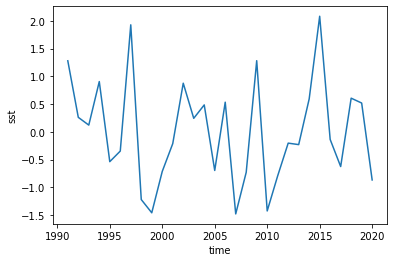

In [3]:
Nino34 = ssta.loc[:,-5:5,190:240].mean(axis=(1,2))
DJF_nino34 = scp.XrTools.spec_moth_yrmean(Nino34,"DJF")
DJF_nino34.plot()

In [4]:
JJA_ssta = scp.XrTools.spec_moth_yrmean(ssta, "JJA")
JJA_ssta.time,DJF_nino34.time

(<xarray.DataArray 'time' (time: 31)>
 array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
        2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
        2015, 2016, 2017, 2018, 2019, 2020, 2021])
 Coordinates:
   * time     (time) int64 1991 1992 1993 1994 1995 ... 2017 2018 2019 2020 2021
     month    (time) int64 6 6 6 6 6 6 6 6 6 6 6 6 6 ... 6 6 6 6 6 6 6 6 6 6 6 6,
 <xarray.DataArray 'time' (time: 30)>
 array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
        2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
        2015, 2016, 2017, 2018, 2019, 2020])
 Coordinates:
   * time     (time) int64 1991 1992 1993 1994 1995 ... 2016 2017 2018 2019 2020
     month    (time) int64 12 12 12 12 12 12 12 12 12 ... 12 12 12 12 12 12 12 12)

In [5]:
reg = scp.LinReg(DJF_nino34[:], JJA_ssta[1:])

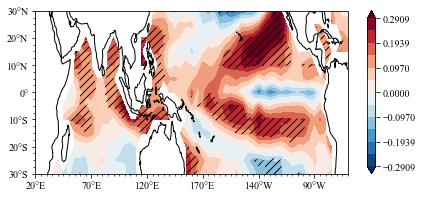

In [6]:
import cartopy.crs as ccrs
import sacpy.Map
fig = plt.figure(figsize=[7, 3])
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
lon ,lat = np.array(ssta.lon) , np.array(ssta.lat)
m = ax.scontourf(lon,lat,reg.slope)
n = ax.sig_plot(lon,lat,reg.p_value,color="k",marker="///")
ax.init_map(stepx=50, smally=2.5)
plt.colorbar(m)
# plt.savefig("../pic/ENSO_Next_year_JJA.png",dpi=300)

In [14]:
lat

array([-30, -25, -20, -15, -10,  -5,   0,   5,  10,  15,  20,  25,  30])

In [ ]:
reg.slope